## 1. Distribution Plots

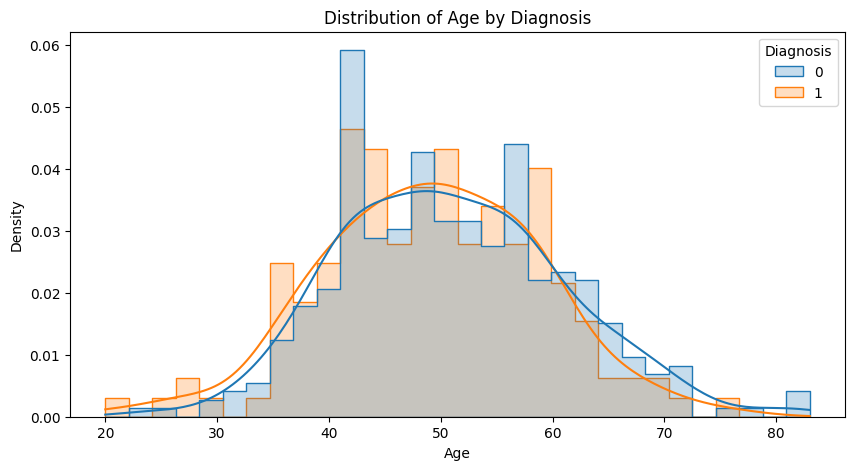

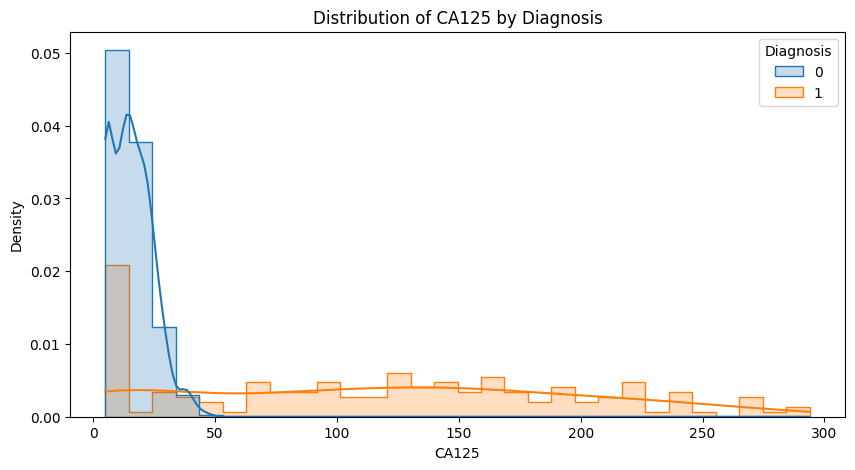

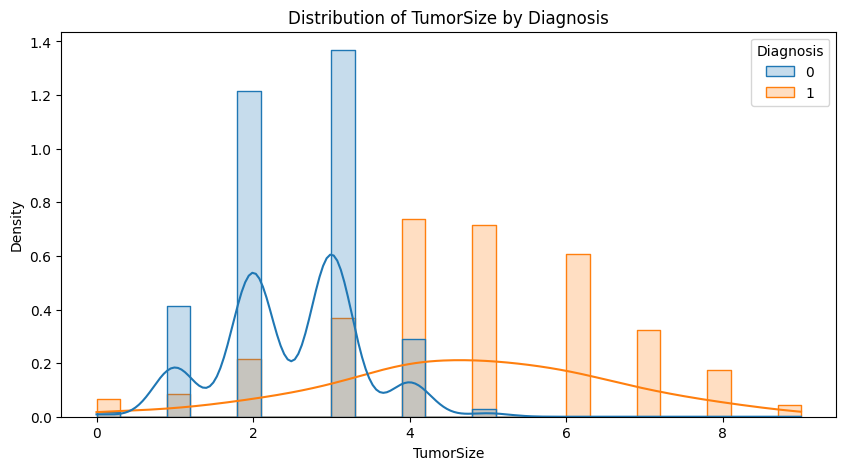

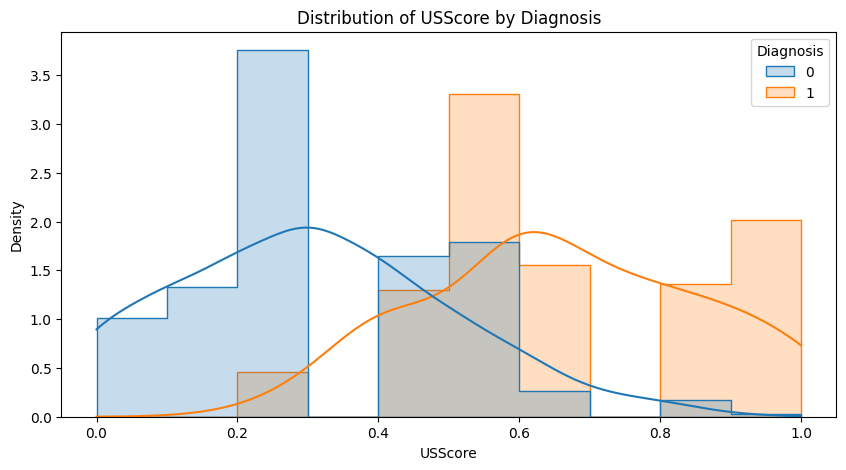

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("synthetic_clinical_dataset.csv")

# Numeric features to plot
numeric_cols = ['Age', 'CA125', 'TumorSize', 'USScore']

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, hue='Diagnosis', bins=(30 if col != "USScore" else 10), 
                 kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {col} by Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()



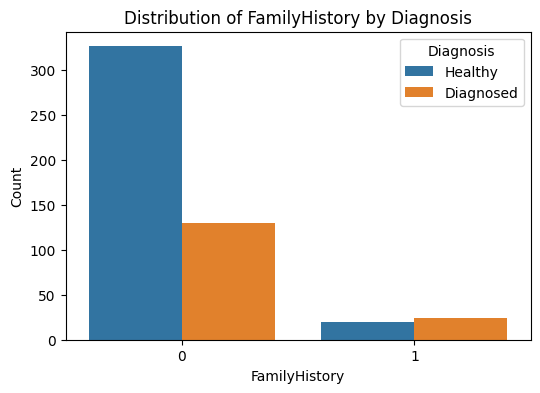

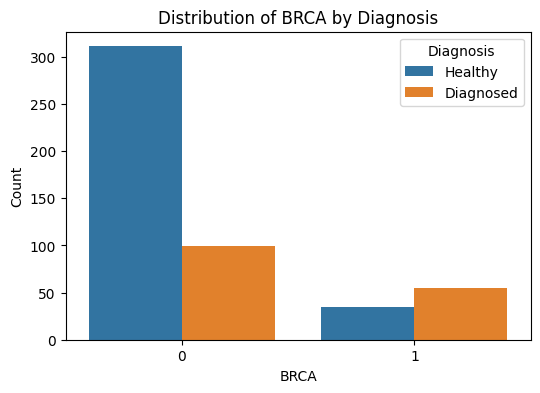

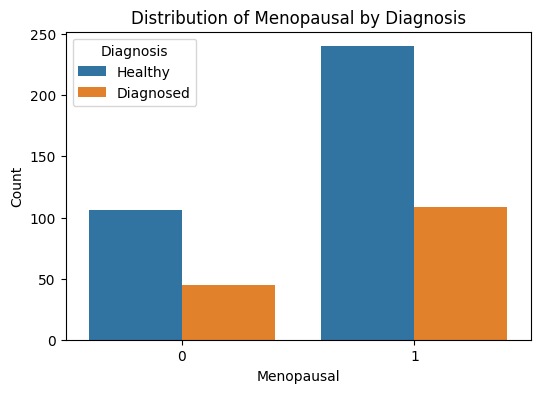

In [58]:
# For binary/categorical 
categorical_cols = ['FamilyHistory', 'BRCA', 'Menopausal']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Diagnosis')
    plt.title(f'Distribution of {col} by Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=['Healthy', 'Diagnosed'])
    plt.show()

## 2. Correlation Matrix

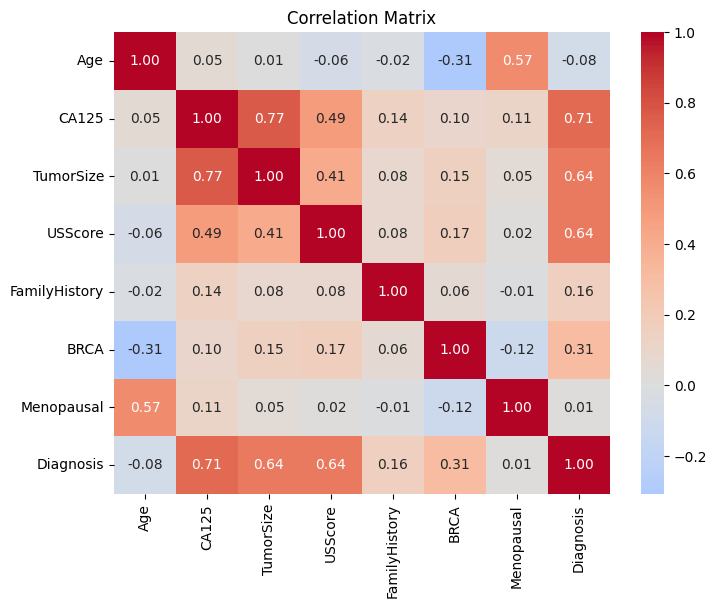

In [59]:
all_cols=['Age', 'CA125', 'TumorSize', 'USScore','FamilyHistory', 'BRCA', 'Menopausal','Diagnosis']
corr_matrix = df[all_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## 3. Plausability check

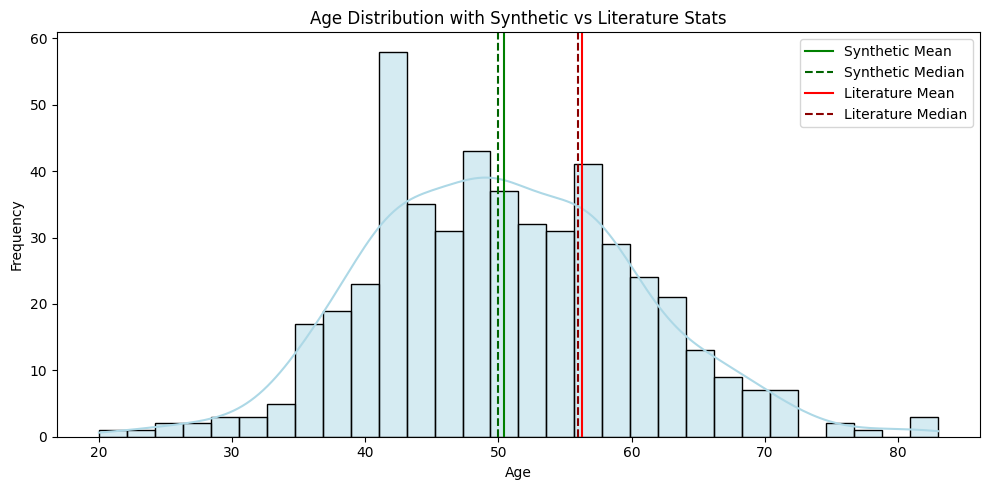

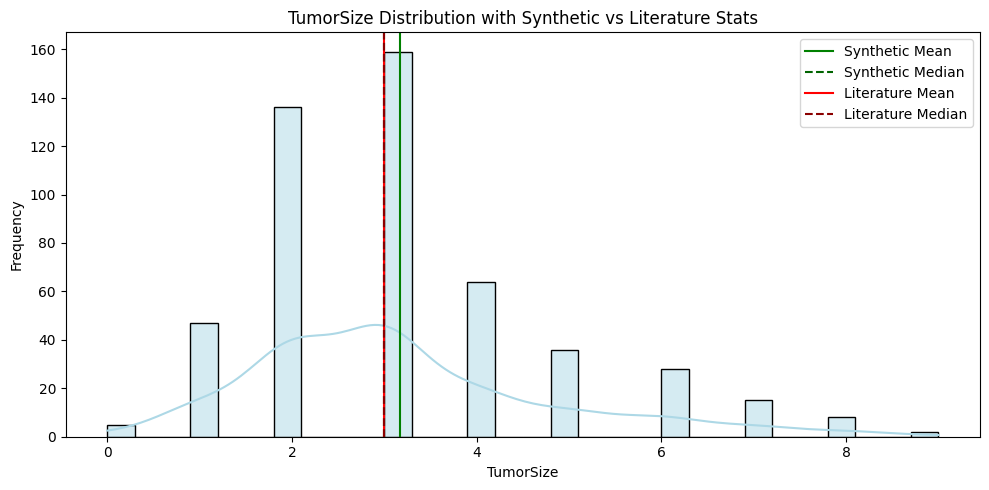

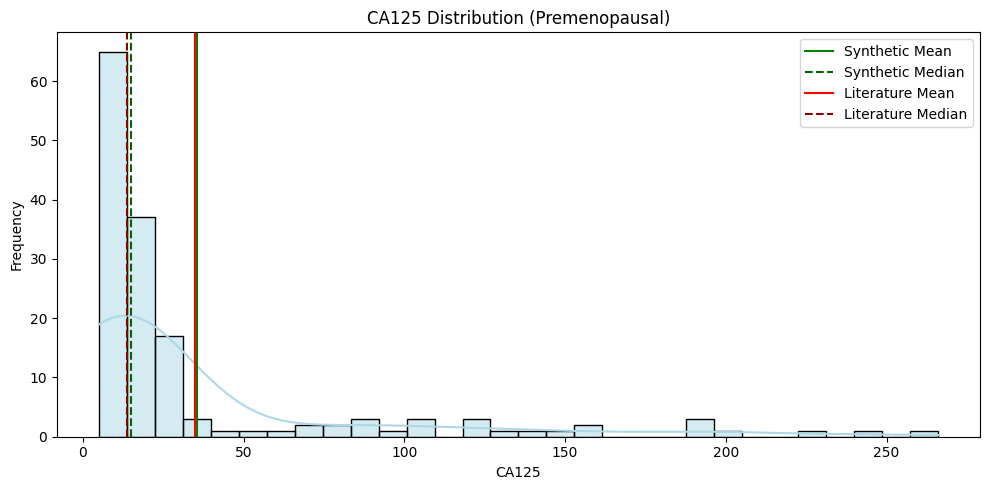

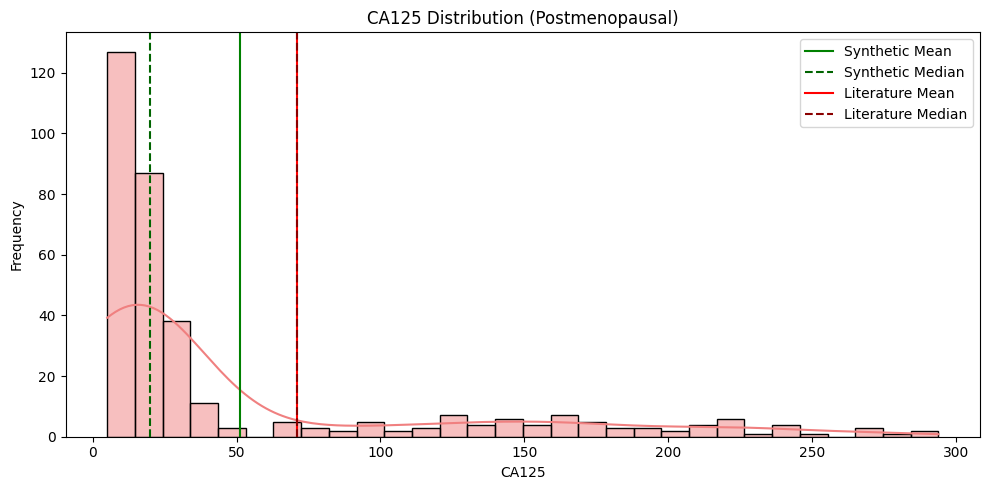

In [70]:

#for all 165 diagnosed cases
features = ['Age', 'TumorSize']

#sources mentioned in ReadMe and Report
literature_stats = {
    'Age': {'mean': 56.3, 'median': 56.0}, 
    'CA125-premenopausal': {'mean': 35.0, 'median': 13.8},
    'CA125-postmenopausal': {'mean': 71.0, 'median': 71.0},
    'TumorSize': {'mean': 3., 'median': 3.0},
}

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, bins=30, color="lightblue")

    # Plot synthetic statistics
    plt.axvline(df[feature].mean(), color='green', linestyle='-', label='Synthetic Mean')
    plt.axvline(df[feature].median(), color='darkgreen', linestyle='--', label='Synthetic Median')

    # Plot literature statistics
    plt.axvline(literature_stats[feature]['mean'], color='red', linestyle='-', label='Literature Mean')
    plt.axvline(literature_stats[feature]['median'], color='darkred', linestyle='--', label='Literature Median')

    plt.title(f'{feature} Distribution with Synthetic vs Literature Stats')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

ca125_pre = df.loc[df['Menopausal'] == 0, 'CA125']
ca125_post = df.loc[df['Menopausal'] == 1, 'CA125']

# Plot for premenopausal CA125
plt.figure(figsize=(10,5))
sns.histplot(ca125_pre, kde=True, bins=30, color="lightblue")
plt.axvline(ca125_pre.mean(), color='green', linestyle='-', label='Synthetic Mean')
plt.axvline(ca125_pre.median(), color='darkgreen', linestyle='--', label='Synthetic Median')
plt.axvline(literature_stats['CA125-premenopausal']['mean'], color='red', linestyle='-', label='Literature Mean')
plt.axvline(literature_stats['CA125-premenopausal']['median'], color='darkred', linestyle='--', label='Literature Median')
plt.title('CA125 Distribution (Premenopausal)')
plt.xlabel('CA125')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for postmenopausal CA125
plt.figure(figsize=(10,5))
sns.histplot(ca125_post, kde=True, bins=30, color="lightcoral")
plt.axvline(ca125_post.mean(), color='green', linestyle='-', label='Synthetic Mean')
plt.axvline(ca125_post.median(), color='darkgreen', linestyle='--', label='Synthetic Median')
plt.axvline(literature_stats['CA125-postmenopausal']['mean'], color='red', linestyle='-', label='Literature Mean')
plt.axvline(literature_stats['CA125-postmenopausal']['median'], color='darkred', linestyle='--', label='Literature Median')
plt.title('CA125 Distribution (Postmenopausal)')
plt.xlabel('CA125')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


## 4. Edge case check 

In [61]:
negative_tumor_size = (df['TumorSize'] < 0).sum()
ca125_below_zero = (df['CA125'] < 0).sum()
age_below_zero = (df['Age'] < 0).sum()  # Just in case
usscore_out_of_bounds = ((df['USScore'] < 0) | (df['USScore'] > 1)).sum()

print(f"Negative Tumor Size values: {negative_tumor_size}")
print(f"CA-125 values below zero: {ca125_below_zero}")
print(f"Age values below zero: {age_below_zero}")
print(f"US Score out of range [0,1]: {usscore_out_of_bounds}")

Negative Tumor Size values: 0
CA-125 values below zero: 0
Age values below zero: 0
US Score out of range [0,1]: 0
